In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir=r"D:\D-downloads\Brain Tumor Data Set\Brain Tumor Data Set"

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set')

In [4]:
len(list(data_dir.glob('*/*.jpg'))),len(list(data_dir.glob('*/*.jpeg'))),len(list(data_dir.glob('*/*.png')))

(4506, 6, 2)

In [5]:
tumor = list(data_dir.glob('Cancer/*'))
len(tumor)

0

In [6]:
full_list=list(data_dir.glob('*/*.jpg'))
full_list[4500:]

[WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (994).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (995).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (996).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (997).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (998).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (999).jpg')]

In [7]:
type(full_list[0])

pathlib.WindowsPath

In [8]:
str(full_list[0]),str(full_list[4500])

('D:\\D-downloads\\Brain Tumor Data Set\\Brain Tumor Data Set\\Brain Tumor\\Cancer (1).jpg',
 'D:\\D-downloads\\Brain Tumor Data Set\\Brain Tumor Data Set\\Healthy\\Not Cancer  (994).jpg')

In [9]:
import re

In [10]:
tumor=[]
for paths in full_list:
    paths=str(paths)
    lis=(re.findall(r'D:\\D-downloads\\Brain Tumor Data Set\\Brain Tumor Data Set\\Brain Tumor\\Cancer[ )(0-9]*.[a-zA-Z]+',paths))
    if len(lis)>0:
        tumor.append(pathlib.Path(lis[0]))

In [11]:
len(tumor)

2426

In [12]:
healthy=[]
for paths in full_list:
    paths=str(paths)
    lis=re.findall(r"D:\\D-downloads\\Brain Tumor Data Set\\Brain Tumor Data Set\\Healthy\\Not Cancer[ )(0-9]*.[a-zA-Z]*",paths)
    if len(lis)>0:
        healthy.append(pathlib.Path(lis[0]))


In [13]:
len(healthy)

2080

In [14]:
tumor[:10]

[WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1005).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set

In [15]:
healthy[:10]

[WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (10).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (100).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1000).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1001).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1002).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1003).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1004).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1005).jpg'),
 WindowsPath('D:/D-downloads/Brain Tumor Data Set/Brain Tumor

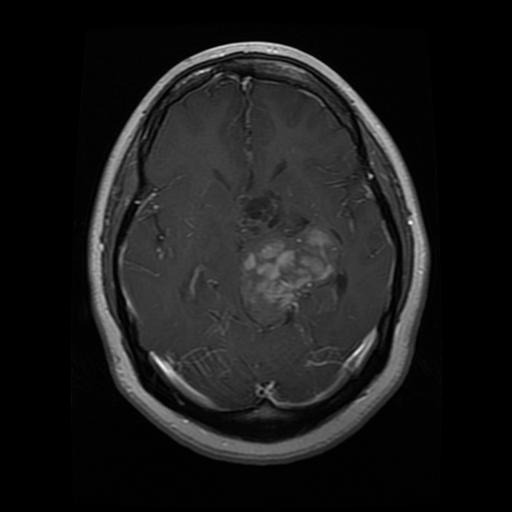

In [16]:
import PIL
PIL.Image.open(str(tumor[0]))

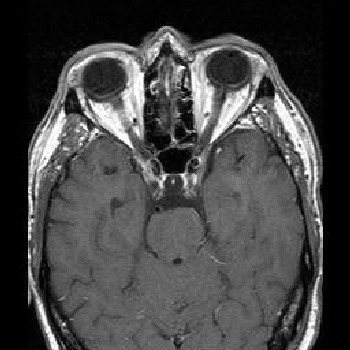

In [17]:
PIL.Image.open(str(healthy[0]))

In [18]:
tumor_images_dict = {
    'tumor': tumor,
    'healthy': healthy,
}
tumor_labels_dict = {
    'tumor':0,
    'healthy':1,
}

In [20]:
np.shape(PIL.Image.open(str(tumor[45])))

(366, 310, 3)

In [21]:
X,y= [],[]
for if_cancer,images in tumor_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(tumor_labels_dict[if_cancer])

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
X.shape,y.shape

((4506, 224, 224, 3), (4506,))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify=y)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3379, 224, 224, 3), (1127, 224, 224, 3), (3379,), (1127,))

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Artificial Neural Network

In [40]:
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(224,224,3)),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(750, activation='relu'),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(2, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
106/106 [==============================] - 198s 2s/step - loss: 744.1949 - accuracy: 0.5487
Epoch 2/5
106/106 [==============================] - 197s 2s/step - loss: 67.4142 - accuracy: 0.6366
Epoch 3/5
106/106 [==============================] - 187s 2s/step - loss: 22.9112 - accuracy: 0.7094
Epoch 4/5
106/106 [==============================] - 190s 2s/step - loss: 9.8634 - accuracy: 0.7594
Epoch 5/5
106/106 [==============================] - 189s 2s/step - loss: 5.1814 - accuracy: 0.8002


In [42]:
ann.evaluate(X_test_scaled, y_test)

36/36 [==============================] - 4s 74ms/step - loss: 0.6245 - accuracy: 0.7808


[0.6245285868644714, 0.7808340787887573]

### CNN (Without dropout and augmentation)

In [44]:
num_classes = 2

cnn1 = Sequential([
  layers.Conv2D(48, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

cnn1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
cnn1.fit(X_train_scaled, y_train, epochs=12)  

Epoch 1/12
106/106 [==============================] - 144s 1s/step - loss: 0.4890 - accuracy: 0.7437
Epoch 2/12
106/106 [==============================] - 144s 1s/step - loss: 0.2877 - accuracy: 0.8766
Epoch 3/12
106/106 [==============================] - 141s 1s/step - loss: 0.1772 - accuracy: 0.9325
Epoch 4/12
106/106 [==============================] - 137s 1s/step - loss: 0.1122 - accuracy: 0.9589
Epoch 5/12
106/106 [==============================] - 138s 1s/step - loss: 0.0595 - accuracy: 0.9831
Epoch 6/12
106/106 [==============================] - 126s 1s/step - loss: 0.0514 - accuracy: 0.9825
Epoch 7/12
106/106 [==============================] - 141s 1s/step - loss: 0.0256 - accuracy: 0.9911
Epoch 8/12
106/106 [==============================] - 156s 1s/step - loss: 0.0079 - accuracy: 0.9979
Epoch 9/12
106/106 [==============================] - 154s 1s/step - loss: 0.0239 - accuracy: 0.9923
Epoch 10/12
106/106 [==============================] - 143s 1s/step - loss: 0.0317 - accura

In [45]:
cnn1.evaluate(X_test_scaled,y_test)

36/36 [==============================] - 11s 276ms/step - loss: 0.0817 - accuracy: 0.9778


[0.08172275125980377, 0.9778172373771667]

### CNN with dropout and augmentation

In [46]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [52]:
num_classes = 2

cnn2 = Sequential([
  data_augmentation,
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.15),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(48, activation='relu'),
  layers.Dense(num_classes)
])

cnn2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
cnn2.fit(X_train_scaled, y_train, epochs=35) 

Epoch 1/35


106/106 [==============================] - 107s 967ms/step - loss: 0.6384 - accuracy: 0.6250
Epoch 2/35
106/106 [==============================] - 103s 974ms/step - loss: 0.5025 - accuracy: 0.7532
Epoch 3/35
106/106 [==============================] - 104s 980ms/step - loss: 0.4506 - accuracy: 0.7869
Epoch 4/35
106/106 [==============================] - 103s 973ms/step - loss: 0.3959 - accuracy: 0.8183
Epoch 5/35
106/106 [==============================] - 103s 974ms/step - loss: 0.3536 - accuracy: 0.8461
Epoch 6/35
106/106 [==============================] - 103s 976ms/step - loss: 0.3200 - accuracy: 0.8553
Epoch 7/35
106/106 [==============================] - 103s 976ms/step - loss: 0.2786 - accuracy: 0.8763
Epoch 8/35
106/106 [==============================] - 104s 980ms/step - loss: 0.2460 - accuracy: 0.8979
Epoch 9/35
106/106 [==============================] - 103s 974ms/step - loss: 0.2457 - accuracy: 0.9000
Epoch 10/35
106/106 [==============================] - 103s 973ms/step - lo

In [53]:
cnn2.evaluate(X_test_scaled,y_test)

36/36 [==============================] - 7s 167ms/step - loss: 0.1249 - accuracy: 0.9681


[0.12494736164808273, 0.9680567979812622]

### CNN with regularisation

In [54]:
num_classes = 2

cnn3 = Sequential([
  layers.Conv2D(48, 3, padding='same', activation='relu'),
  layers.Dropout(0.05),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Dropout(0.15),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(num_classes)
])

cnn3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
cnn3.fit(X_train_scaled, y_train, epochs=12)  

Epoch 1/12
106/106 [==============================] - 202s 2s/step - loss: 0.5844 - accuracy: 0.6739
Epoch 2/12
106/106 [==============================] - 186s 2s/step - loss: 0.3671 - accuracy: 0.8426
Epoch 3/12
106/106 [==============================] - 192s 2s/step - loss: 0.2745 - accuracy: 0.8867
Epoch 4/12
106/106 [==============================] - 188s 2s/step - loss: 0.2037 - accuracy: 0.9236
Epoch 5/12
106/106 [==============================] - 186s 2s/step - loss: 0.1283 - accuracy: 0.9538
Epoch 6/12
106/106 [==============================] - 185s 2s/step - loss: 0.0941 - accuracy: 0.9672
Epoch 7/12
106/106 [==============================] - 186s 2s/step - loss: 0.0703 - accuracy: 0.9751
Epoch 8/12
106/106 [==============================] - 191s 2s/step - loss: 0.0538 - accuracy: 0.9817
Epoch 9/12
106/106 [==============================] - 189s 2s/step - loss: 0.0603 - accuracy: 0.9790
Epoch 10/12
106/106 [==============================] - 191s 2s/step - loss: 0.0369 - accura

In [55]:
cnn3.evaluate(X_test_scaled,y_test)

36/36 [==============================] - 12s 274ms/step - loss: 0.1479 - accuracy: 0.9654


[0.14792539179325104, 0.9653948545455933]

### Mobile net v2

In [56]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [57]:
num_of_classes = 2

mobilenet_v2_model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

mobilenet_v2_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_30 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [58]:
mobilenet_v2_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

mobilenet_v2_model.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
106/106 [==============================] - 68s 588ms/step - loss: 0.3847 - acc: 0.8292
Epoch 2/25
106/106 [==============================] - 62s 587ms/step - loss: 0.1990 - acc: 0.9396
Epoch 3/25
106/106 [==============================] - 61s 570ms/step - loss: 0.1634 - acc: 0.9521
Epoch 4/25
106/106 [==============================] - 60s 565ms/step - loss: 0.1363 - acc: 0.9574
Epoch 5/25
106/106 [==============================] - 59s 556ms/step - loss: 0.1186 - acc: 0.9669
Epoch 6/25
106/106 [==============================] - 60s 563ms/step - loss: 0.1074 - acc: 0.9689
Epoch 7/25
106/106 [==============================] - 61s 576ms/step - loss: 0.0981 - acc: 0.9695
Epoch 8/25
106/106 [==============================] - 60s 569ms/step - loss: 0.0892 - acc: 0.9734
Epoch 9/25
106/106 [==============================] - 60s 562ms/step - loss: 0.0813 - acc: 0.9781
Epoch 10/25
106/106 [==============================] - 62s 581ms/step - loss: 0.0761 - acc: 0.9784
Epoch 11/25
106/106

In [59]:
mobilenet_v2_model.evaluate(X_test_scaled,y_test)

36/36 [==============================] - 31s 583ms/step - loss: 0.0803 - acc: 0.9787


[0.08031444996595383, 0.9787045121192932]

In [60]:
Y_pred = mobilenet_v2_model.predict(X_test_scaled)

36/36 [==============================] - 23s 574ms/step


In [61]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [62]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,Y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       607
           1       0.97      0.98      0.98       520

    accuracy                           0.98      1127
   macro avg       0.98      0.98      0.98      1127
weighted avg       0.98      0.98      0.98      1127



Text(69.0, 0.5, 'Truth')

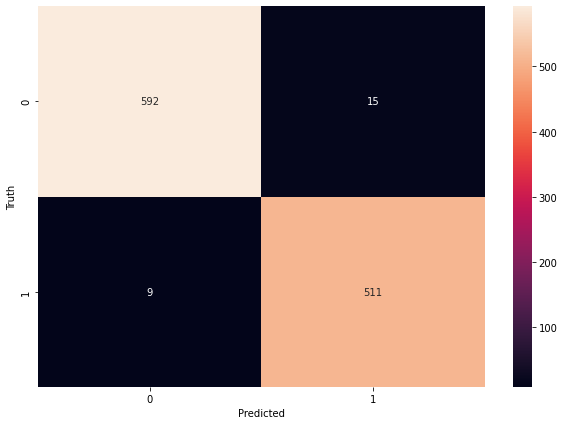

In [63]:
import seaborn as sns
cm=confusion_matrix(y_test,Y_pred_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')